In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("test.csv")


In [2]:
print("Dataset Info:")
print(df.info())
print("\n Null values:")
print(df.isnull().sum())
print("\n Duplicates:")
print(df.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29799 entries, 0 to 29798
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          29799 non-null  object 
 1   context     29799 non-null  object 
 2   question    29799 non-null  object 
 3   choices     29799 non-null  object 
 4   raw_input   0 non-null      float64
 5   raw_output  0 non-null      float64
 6   answer      0 non-null      float64
dtypes: float64(3), object(4)
memory usage: 1.6+ MB
None

 Null values:
ID                0
context           0
question          0
choices           0
raw_input     29799
raw_output    29799
answer        29799
dtype: int64

 Duplicates:
0


In [3]:
# Choice count
df["num_choices"] = df["choices"].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
print("\n Number of choices per row:")
print(df["num_choices"].value_counts())


 Number of choices per row:
num_choices
3    29799
Name: count, dtype: int64


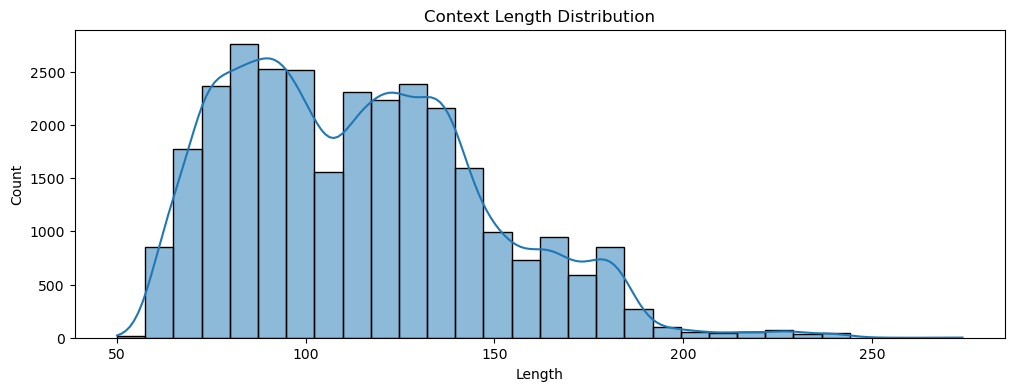

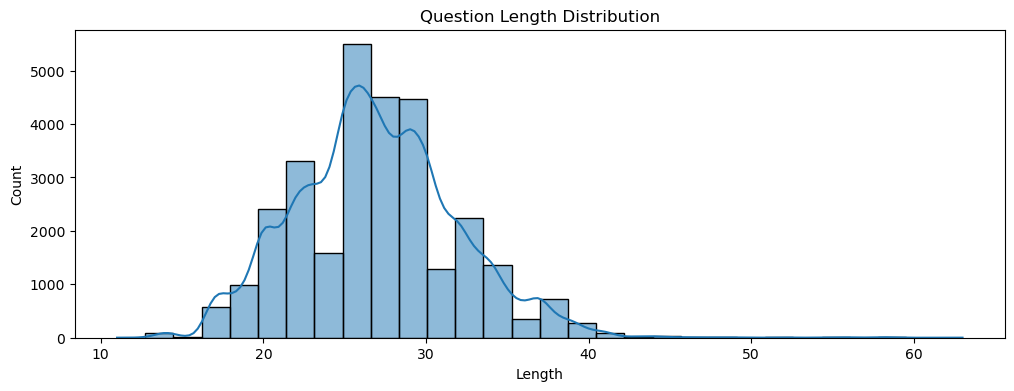

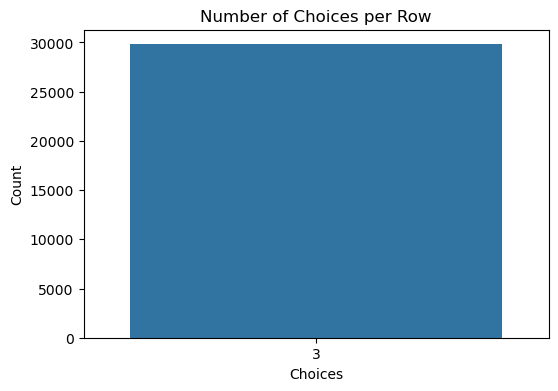

In [5]:
# Context/question length
df["context_len"] = df["context"].apply(lambda x: len(str(x)))
df["question_len"] = df["question"].apply(lambda x: len(str(x)))

# Plots
plt.figure(figsize=(12, 4))
sns.histplot(df["context_len"], bins=30, kde=True)
plt.title("Context Length Distribution")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 4))
sns.histplot(df["question_len"], bins=30, kde=True)
plt.title("Question Length Distribution")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="num_choices", data=df)
plt.title("Number of Choices per Row")
plt.xlabel("Choices")
plt.ylabel("Count")
plt.show()

In [8]:
import pandas as pd

# Load your test data
df = pd.read_csv("test.csv")

# Define bias keyword categories
bias_keywords = {
    "gender": ["여성", "남성", "부인", "아내", "남편", "딸", "아들", "트랜스젠더", "성소수자", "남자", "여자"],
    "race": ["흑인", "백인", "아시아인", "유럽인", "동양인", "중동인"],
    "nationality": ["한국", "중국", "일본", "미국", "프랑스", "덴마크", "태국", "베트남", "말레이시아", "가나", "노르웨이"],
    "religion": ["기독교", "이슬람", "불교", "힌두교", "교회", "종교"],
    "politics": ["보수", "진보", "좌파", "우파"],
    "age": ["노인", "청년", "아이", "노년", "노령"]
}

# 분류 함수 정의
def classify_choice(choices_str):
    try:
        items = eval(choices_str)
        tags = []
        for item in items:
            tag = []
            if any(g in item for g in bias_keywords["gender"]):
                tag.append("gender")
            if any(n in item for n in bias_keywords["nationality"]):
                tag.append("nationality")
            if not tag:
                tag.append("unknown")
            tags.append("+".join(tag))
        return tags
    except:
        return ["parse_error"]

# 적용
df["choice_tags"] = df["choices"].apply(classify_choice)

# Save result
df[["ID", "choices", "choice_tags"]].to_csv("choice_tagged.csv", index=False, encoding="utf-8-sig")
print("저장 완료: choice_tagged.csv")

저장 완료: choice_tagged.csv


In [9]:

# classify_choice 함수와 bias_keywords 사전 정의한 뒤
df["choice_tags"] = df["choices"].apply(classify_choice)

# 태그 평탄화 후 분포 계산
from collections import Counter
all_tags = [tag for sublist in df["choice_tags"] for tag in sublist]
Counter(all_tags)

Counter({'unknown': 63095,
         'gender': 20630,
         'gender+nationality': 3212,
         'nationality': 2460})